In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

## Data Loading and Preprocessing

In [2]:
df = pd.read_csv('8taijiquan.csv')


In [3]:
df.head()


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Horse Stance,0.541925,0.027291,-0.444803,0.999967,0.553414,0.004943,-0.419326,0.999922,0.560963,...,0.318959,0.965692,0.776243,0.852805,-0.021304,0.978144,0.332646,0.775090,0.204000,0.969157
1,Horse Stance,0.539803,0.027713,-0.403085,0.999965,0.551248,0.005302,-0.377179,0.999918,0.559007,...,0.271220,0.966245,0.771701,0.852959,-0.017397,0.978058,0.330101,0.774388,0.143472,0.969879
2,Horse Stance,0.530960,0.027098,-0.395315,0.999966,0.543166,0.003726,-0.364541,0.999922,0.551654,...,0.219718,0.965599,0.759178,0.854371,-0.085018,0.977920,0.315229,0.775108,0.092720,0.969799
3,Horse Stance,0.525954,0.031542,-0.351817,0.999968,0.538415,0.007005,-0.320548,0.999926,0.546899,...,0.254622,0.965524,0.752015,0.858353,-0.120606,0.978544,0.307442,0.780187,0.134651,0.970135
4,Horse Stance,0.516566,0.033738,-0.336397,0.999970,0.528133,0.009105,-0.302938,0.999932,0.536723,...,0.262201,0.965309,0.746161,0.858981,-0.114481,0.978957,0.301217,0.786082,0.143257,0.970141


In [4]:
# Get unique values in the 'class' column
unique_classes = df['class'].unique()

# Display the unique values
print("Unique Classes:", unique_classes)

Unique Classes: ['Horse Stance' 'Bow-Arrow Stance' 'Sitting on Crossed Legs Stance'
 'Four-Six Stance' 'Tiger Stance' 'False Stance'
 'Golden Rooster Standing Stance' 'Squat Stance']


In [5]:
# Check the distribution of classes
print(df['class'].value_counts())

class
Squat Stance                      588
Golden Rooster Standing Stance    582
Horse Stance                      541
Sitting on Crossed Legs Stance    494
Bow-Arrow Stance                  479
Four-Six Stance                   469
False Stance                      431
Tiger Stance                      427
Name: count, dtype: int64


In [6]:
df[df['class']=='Horse Stance']


,class,x1,y1,z1,v1,x2,y2,z2,v2,x3,...,z31,v31,x32,y32,z32,v32,x33,y33,z33,v33
0,Horse Stance,0.541925,0.027291,-0.444803,0.999967,0.553414,0.004943,-0.419326,0.999922,0.560963,...,0.318959,0.965692,0.776243,0.852805,-0.021304,0.978144,0.332646,0.775090,0.204000,0.969157
1,Horse Stance,0.539803,0.027713,-0.403085,0.999965,0.551248,0.005302,-0.377179,0.999918,0.559007,...,0.271220,0.966245,0.771701,0.852959,-0.017397,0.978058,0.330101,0.774388,0.143472,0.969879
2,Horse Stance,0.530960,0.027098,-0.395315,0.999966,0.543166,0.003726,-0.364541,0.999922,0.551654,...,0.219718,0.965599,0.759178,0.854371,-0.085018,0.977920,0.315229,0.775108,0.092720,0.969799
3,Horse Stance,0.525954,0.031542,-0.351817,0.999968,0.538415,0.007005,-0.320548,0.999926,0.546899,...,0.254622,0.965524,0.752015,0.858353,-0.120606,0.978544,0.307442,0.780187,0.134651,0.970135
4,Horse Stance,0.516566,0.033738,-0.336397,0.999970,0.528133,0.009105,-0.302938,0.999932,0.536723,...,0.262201,0.965309,0.746161,0.858981,-0.114481,0.978957,0.301217,0.786082,0.143257,0.970141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,Horse Stance,0.502571,0.067934,-0.503047,0.999997,0.511978,0.045246,-0.459007,0.999995,0.518896,...,0.144249,0.947786,0.750710,0.908810,-0.005152,0.961449,0.214746,0.948060,-0.038133,0.971462
537,Horse Stance,0.504599,0.063859,-0.508674,0.999997,0.514085,0.041066,-0.464188,0.999995,0.520932,...,0.143063,0.947810,0.750742,0.908846,-0.019000,0.961840,0.215023,0.947773,-0.048300,0.971534
538,Horse Stance,0.505542,0.061005,-0.502130,0.999997,0.514819,0.039138,-0.460374,0.999995,0.521683,...,0.147871,0.948037,0.750713,0.909088,-0.018940,0.961800,0.215147,0.948221,-0.047962,0.971576
539,Horse Stance,0.505576,0.058852,-0.469122,0.999997,0.515051,0.036197,-0.424975,0.999995,0.521849,...,0.164576,0.946854,0.749133,0.909283,-0.009245,0.961514,0.215243,0.948535,-0.028432,0.971265


In [7]:
print(df.dtypes)


class     object
x1       float64
y1       float64
z1       float64
v1       float64
          ...   
v32      float64
x33      float64
y33      float64
z33      float64
v33      float64
Length: 133, dtype: object


## Histogram

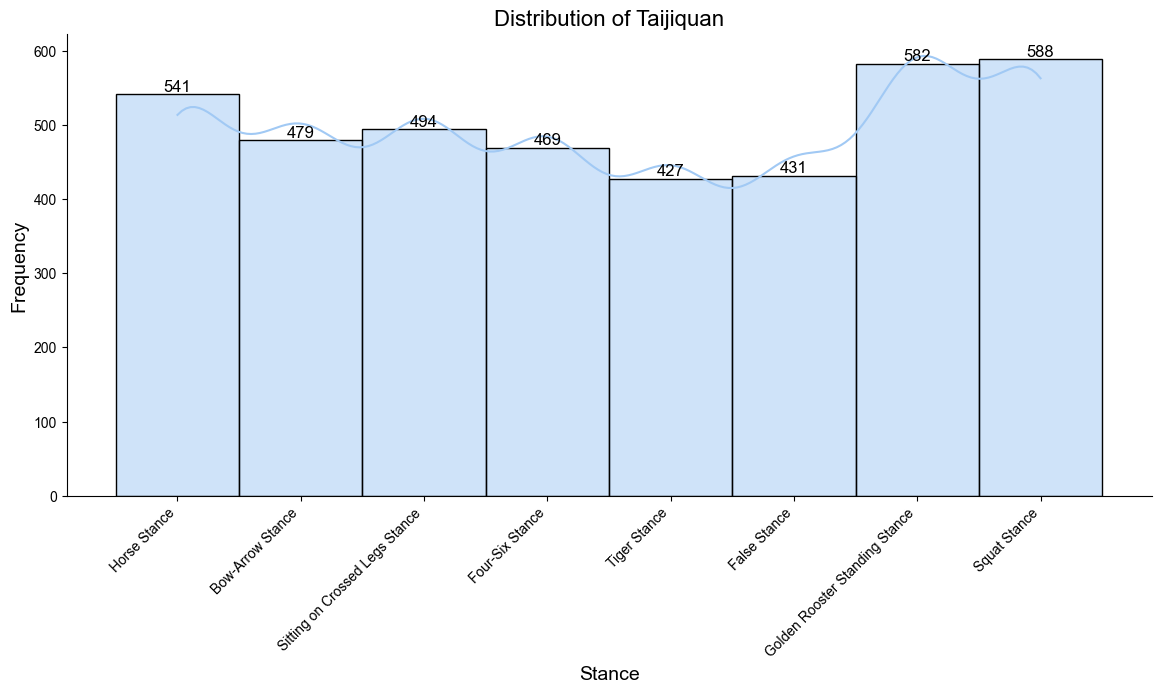

In [8]:
# Set the color palette to 'pastel'
sns.set_palette('pastel')

# Create the histogram plot
plt.figure(figsize=(14, 6))  # Adjust the figure size as needed
sns.histplot(df['class'], bins=20, kde=True)

plt.xlabel('Stance', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Taijiquan', fontsize=16)

plt.xticks(rotation=45, ha='right')

for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}',
                ha='center', va='bottom', fontsize=12, color='black')

sns.set_style("whitegrid")  
sns.despine()

plt.show()


##  Training, validation, and testing sets

In [9]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df.drop('class', axis=1),  # Features (X)
    df['class'],                # Target variable (y)
    test_size=0.3,              # Percentage of data for the validation set
    random_state=42,            # Random state
    stratify=df['class']         # Class distribution in the splits
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp,                     # Features (X) after the first split
    y_temp,                     # Target variable (y) after the first split
    test_size=0.5,              # Percentage of data for the test set (relative to X_temp)
    random_state=42,            # Random state
    stratify=y_temp              # Class distribution in the splits
)


## Landmark-based Augmentation

In [10]:
# Function to apply landmark-based augmentation
def apply_landmark_augmentation(landmarks, angle_range=(-10, 10), scale_range=(0.9, 1.1)):
    augmented_landmarks = landmarks.copy()
    num_landmarks = landmarks.shape[0]

    # Apply augmentation to each landmark
    for i in range(num_landmarks):
        angle = np.random.uniform(angle_range[0], angle_range[1])
        rotation_matrix = np.array([[np.cos(np.radians(angle)), -np.sin(np.radians(angle))],
                                    [np.sin(np.radians(angle)), np.cos(np.radians(angle))]])
        augmented_landmarks[i, :2] = np.dot(augmented_landmarks[i, :2], rotation_matrix.T)
        scale_factor = np.random.uniform(scale_range[0], scale_range[1])
        augmented_landmarks[i, :2] *= scale_factor

    return augmented_landmarks.flatten()

In [11]:
# Apply landmark-based augmentation to X_train
X_train_augmented = []
for index, row in X_train.iterrows():
    landmarks = np.array(row).reshape(-1, 4)  
    augmented_landmarks = apply_landmark_augmentation(landmarks)
    X_train_augmented.append(augmented_landmarks)

X_train_augmented = pd.DataFrame(X_train_augmented, columns=X_train.columns)


## Model Definition and Training

In [12]:
# Encode class labels to numerical values
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

In [13]:
# Define the FNN model with modifications
def create_fnn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=input_shape))
    model.add(Dropout(0.5))  # Adjust dropout rate
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model.add(Dropout(0.5))  # Adjust dropout rate
    model.add(Dense(len(label_encoder.classes_), activation='softmax'))

    optimizer = Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Create and train the FNN model with early stopping
input_shape_fnn = (X_train_augmented.shape[1],)
fnn_model = create_fnn_model(input_shape_fnn)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

fnn_history = fnn_model.fit(X_train_augmented, y_train_encoded, epochs=20, batch_size=32, validation_data=(X_val, y_val_encoded), callbacks=[early_stopping])


Epoch 1/20
88/88 [==============================] - 5s 15ms/step - loss: 2.4206 - accuracy: 0.1372 - val_loss: 1.9977 - val_accuracy: 0.3090
Epoch 2/20
88/88 [==============================] - 0s 4ms/step - loss: 2.1307 - accuracy: 0.1639 - val_loss: 1.9522 - val_accuracy: 0.3987
Epoch 3/20
88/88 [==============================] - 0s 4ms/step - loss: 2.0401 - accuracy: 0.1910 - val_loss: 1.8847 - val_accuracy: 0.6694
Epoch 4/20
88/88 [==============================] - 0s 4ms/step - loss: 1.9599 - accuracy: 0.2259 - val_loss: 1.8063 - val_accuracy: 0.6113
Epoch 5/20
88/88 [==============================] - 0s 4ms/step - loss: 1.9040 - accuracy: 0.2722 - val_loss: 1.7347 - val_accuracy: 0.6395
Epoch 6/20
88/88 [==============================] - 0s 4ms/step - loss: 1.8339 - accuracy: 0.3082 - val_loss: 1.6531 - val_accuracy: 0.6728
Epoch 7/20
88/88 [==============================] - 0s 4ms/step - loss: 1.7822 - accuracy: 0.3406 - val_loss: 1.5731 - val_accuracy: 0.7176
Epoch 8/20
88/88 [=

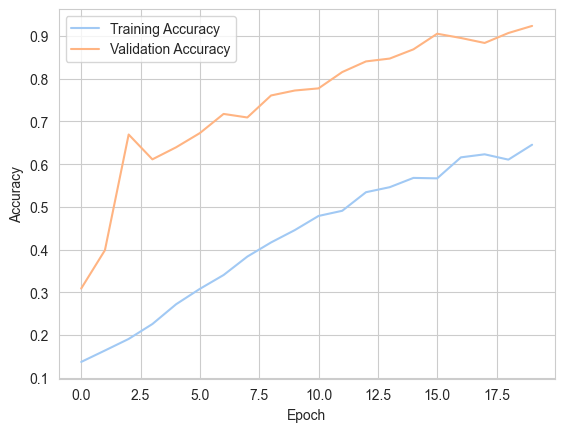

In [14]:
plt.plot(fnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(fnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Model Evaluation and Testing

In [15]:
# Evaluate the FNN model on the test set
test_loss_fnn, test_accuracy_fnn = fnn_model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy (FNN): {test_accuracy_fnn}')


19/19 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.9269
Test Accuracy (FNN): 0.9269102811813354


19/19 [==============================] - 1s 5ms/step
[[66  0  0  6  0  0  0  0]
 [ 0 65  0  0  0  0  0  0]
 [ 0  0 70  0  0  0  0  0]
 [ 0  0  0 88  0  0  0  0]
 [ 0  0  0  0 80  0  1  0]
 [ 0  0  0  0  0 74  0  0]
 [ 0  0  0  0  0  0 88  0]
 [ 0  0  0  0  0  0 37 27]]


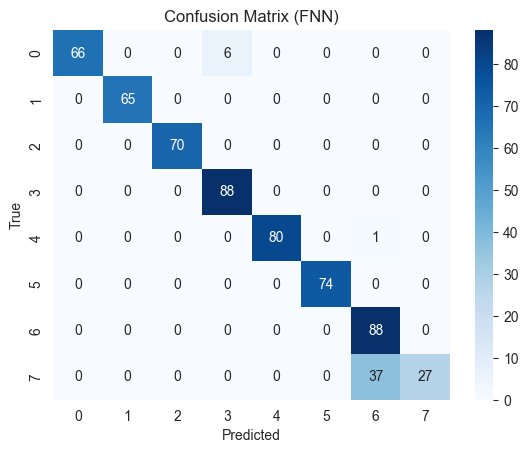

Classification Report (FNN):
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        72
           1       1.00      1.00      1.00        65
           2       1.00      1.00      1.00        70
           3       0.94      1.00      0.97        88
           4       1.00      0.99      0.99        81
           5       1.00      1.00      1.00        74
           6       0.70      1.00      0.82        88
           7       1.00      0.42      0.59        64

    accuracy                           0.93       602
   macro avg       0.95      0.92      0.92       602
weighted avg       0.95      0.93      0.92       602



In [16]:
# Confusion Matrix for FNN
y_pred_fnn = fnn_model.predict(X_test)
y_pred_classes_fnn = np.argmax(y_pred_fnn, axis=1)
conf_matrix_fnn = confusion_matrix(y_test_encoded, y_pred_classes_fnn)
print(conf_matrix_fnn)
sns.heatmap(conf_matrix_fnn, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (FNN)')
plt.show()

# Classification Report for FNN
class_report_fnn = classification_report(y_test_encoded, y_pred_classes_fnn)
print('Classification Report (FNN):')
print(class_report_fnn)


# K-Fold Cross Validation

In [17]:
# K-Fold Cross Validation
X_train_augmented = np.array(X_train_augmented)
y_train_encoded = np.array(y_train_encoded)

# Define the number of folds
n_splits = 5  

# Initialize StratifiedKFold
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results for each fold
all_train_accuracy = []
all_val_accuracy = []

# Loop through the folds
for fold_num, (train_index, val_index) in enumerate(kf.split(X_train_augmented, y_train_encoded), 1):
    X_train_fold, X_val_fold = X_train_augmented[train_index], X_train_augmented[val_index]
    y_train_fold, y_val_fold = y_train_encoded[train_index], y_train_encoded[val_index]

    # Create and train the FNN model for each fold
    fnn_model = create_fnn_model(input_shape_fnn)
    history = fnn_model.fit(
        X_train_fold, y_train_fold,
        epochs=20, batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]
    )

    # Evaluate the model on the training and validation data for each fold
    _, train_accuracy = fnn_model.evaluate(X_train_fold, y_train_fold, verbose=0)
    _, val_accuracy = fnn_model.evaluate(X_val_fold, y_val_fold, verbose=0)

    print(f"Fold {fold_num}: Training Accuracy = {train_accuracy:.4f}, Validation Accuracy = {val_accuracy:.4f}")

    # Store the training and validation accuracy for each fold
    all_train_accuracy.append(train_accuracy)
    all_val_accuracy.append(val_accuracy)

# Calculate the average training and validation accuracy over all folds
avg_train_accuracy = np.mean(all_train_accuracy)
avg_val_accuracy = np.mean(all_val_accuracy)

print(f"\nAverage Training Accuracy Across Folds = {avg_train_accuracy:.4f}")
print(f"Average Validation Accuracy Across Folds = {avg_val_accuracy:.4f}")


Epoch 1/20
71/71 [==============================] - 3s 13ms/step - loss: 2.3279 - accuracy: 0.1327 - val_loss: 2.0666 - val_accuracy: 0.1370
Epoch 2/20
71/71 [==============================] - 1s 8ms/step - loss: 2.1463 - accuracy: 0.1408 - val_loss: 1.9967 - val_accuracy: 0.1957
Epoch 3/20
71/71 [==============================] - 0s 6ms/step - loss: 2.0550 - accuracy: 0.1808 - val_loss: 1.9371 - val_accuracy: 0.3541
Epoch 4/20
71/71 [==============================] - 0s 7ms/step - loss: 1.9746 - accuracy: 0.2178 - val_loss: 1.8679 - val_accuracy: 0.4377
Epoch 5/20
71/71 [==============================] - 0s 6ms/step - loss: 1.9206 - accuracy: 0.2517 - val_loss: 1.8057 - val_accuracy: 0.6388
Epoch 6/20
71/71 [==============================] - 0s 5ms/step - loss: 1.8759 - accuracy: 0.2967 - val_loss: 1.7592 - val_accuracy: 0.6922
Epoch 7/20
71/71 [==============================] - 0s 5ms/step - loss: 1.8379 - accuracy: 0.3118 - val_loss: 1.6999 - val_accuracy: 0.7669
Epoch 8/20
71/71 [=

## Percentage of Keypoints

In [18]:

# Define a function to calculate accuracy for a single keypoint
def calculate_keypoint_accuracy(predicted_keypoint, ground_truth_keypoint, threshold):
    distance = np.linalg.norm(np.array(predicted_keypoint) - np.array(ground_truth_keypoint))
    return int(distance < threshold)

# Define a function to calculate accuracy for all 33 landmarks
def calculate_overall_accuracy(predicted_landmarks, ground_truth_landmarks, threshold):
    num_landmarks = len(predicted_landmarks)
    accuracies = [calculate_keypoint_accuracy(predicted_landmarks[i], ground_truth_landmarks[i], threshold) for i in range(num_landmarks)]
    percentage_accurate = sum(accuracies) / num_landmarks * 100
    return percentage_accurate

# Usage
threshold = 0.5  # Define your accuracy threshold
predicted_landmarks = y_pred_classes_fnn  
ground_truth_landmarks = y_test_encoded    

accuracy = calculate_overall_accuracy(predicted_landmarks, ground_truth_landmarks, threshold)
print(f"Overall Accuracy: {accuracy:.2f}%")


Overall Accuracy: 92.69%


## Statistical Testing

In [19]:
from scipy.stats import f_oneway

# Combine the training and validation accuracies for each fold into a list of arrays
all_accuracies = [np.array([all_train_accuracy[i], all_val_accuracy[i]]) for i in range(n_splits)]

# Perform one-way ANOVA
statistic, p_value = f_oneway(*all_accuracies)

# Print the results
print(f'ANOVA Statistic: {statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There are significant differences between at least two group means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between group means.")


ANOVA Statistic: 295.1019741218318
P-value: 4.0319309542226855e-06
Reject the null hypothesis. There are significant differences between at least two group means.


## Model Deployment and Inference

In [20]:
# Convert the model to TensorFlow Lite format (optional)
converter = tf.lite.TFLiteConverter.from_keras_model(fnn_model)
tflite_model = converter.convert()
with open('model_fnn.tflite', 'wb') as f:
    f.write(tflite_model)


INFO:tensorflow:Assets written to: C:\Users\john\AppData\Local\Temp\tmpv30v1jkd\assets


INFO:tensorflow:Assets written to: C:\Users\john\AppData\Local\Temp\tmpv30v1jkd\assets


In [21]:
import cv2
import mediapipe as mp
import pandas as pd
import numpy as np
import tensorflow as tf

# Load the TensorFlow Lite model
tflite_model_path = './model_fnn.tflite'  # Adjust the path accordingly
interpreter = tf.lite.Interpreter(model_path=tflite_model_path)
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Initialize BlazePose
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
pose = mp_pose.Pose(
    min_detection_confidence=0.6,
    min_tracking_confidence=0.6
)

# Start capturing video from the camera
cap = cv2.VideoCapture(0) # 1 for webcam
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1200)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 500)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with BlazePose
    results = pose.process(frame_rgb)

    # Recolor image back to BGR for rendering
    frame = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

    # Detect Taijiquan Stances (class)
    if results.pose_landmarks:
        # Extract Pose landmarks
        pose_landmarks = results.pose_landmarks.landmark
        pose_row = list(np.array([[landmark.x, landmark.y, landmark.z, landmark.visibility] for landmark in pose_landmarks]).flatten())

        # Make Detections
        X = pd.DataFrame([pose_row])

        # Convert X to numpy array
        input_data = X.to_numpy().astype(np.float32)

        # Set the input tensor
        interpreter.set_tensor(input_details[0]['index'], input_data)

        # Run inference
        interpreter.invoke()

        # Get the output tensor
        output_data = interpreter.get_tensor(output_details[0]['index'])

        # Get the predicted class and probabilities
        body_language_class = np.argmax(output_data)
        body_language_prob = output_data[0]

        print(body_language_class, body_language_prob)

        # Display Probability
        cv2.putText(frame, 'PROB', (15, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.putText(frame, str(round(body_language_prob[body_language_class], 2)),
                    (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1, cv2.LINE_AA)

        # Display detected class
        cv2.putText(frame, f'CLASS: {body_language_class}', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 1,
                    cv2.LINE_AA)

        # Draw pose landmarks
        mp_drawing.draw_landmarks(
            frame,
            results.pose_landmarks,
            mp_pose.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

    cv2.imshow('Pose Detection', frame)

    # Check for exit key (q)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()